In [121]:
# Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [122]:
# Read the csv file and load
water_df = pd.read_csv("water_potability.csv")
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [123]:
# Know about the dataset
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [124]:
# view data where potability = 1
water_df.loc[water_df.Potability == 1]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,NaN,169.974849,23403.637304,8.519730,NaN,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## WHO Standards for the potable water
* PH between 6.50 - 8.50 pH
* Choramines <= 4 mg/L (CDC)
* Conductivity <=400 mueS/cm (WHO)
* Trihalomethanes <= 80 ppm (US)
* Solids between 500 - 1000 mg/L (WHO)
* Organic Cabon < 2 mg/L (US)
* Turbidity < 5 NTU (WHO)

In [125]:
# Copying data
clean_water = water_df.copy()

# Find any null values in the dataset
clean_water.isna().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [126]:
# Drop null values
clean_water.dropna(inplace = True)

# Find correlation with the feature potability
clean_water.corr()[["Potability"]]

,Potability
ph,0.014530
Hardness,-0.001505
Solids,0.040674
Chloramines,0.020784
Sulfate,-0.015303
Conductivity,-0.015496
Organic_carbon,-0.015567
Trihalomethanes,0.009244
Turbidity,0.022682
Potability,1.000000


<AxesSubplot:>

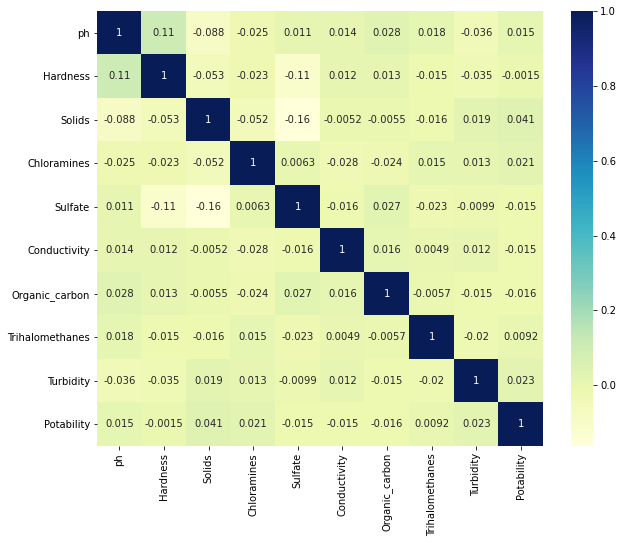

In [127]:
import plotly.express as px
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(clean_water.corr(), annot=True, cmap="YlGnBu")

## Inference
* No features of the dataset looks a strong correlation with the target column 'Potability'. This shows the difficulty of finding an apt model for the better accuracy prediction.

In [164]:
# Split the features columns into features and target
X = clean_water.drop('Potability', axis = 1)
y = clean_water["Potability"]

In [165]:
# Use train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45, test_size=0.20)

In [166]:
# Scaling the data using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [167]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train_scaled, y_train)


print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")

Training Data Score: 0.5970149253731343
Testing Data Score: 0.6401985111662531


## Applying PCA to reduce dimensions

In [168]:
from sklearn.decomposition import PCA
pca = PCA()
water_pca = pca.fit_transform(X_train_scaled)
pca.explained_variance_ratio_

array([0.13573998, 0.12812803, 0.11973443, 0.11300887, 0.10974924,
       0.10493071, 0.10318189, 0.10049898, 0.08502787])

In [169]:
pca_df = pd.DataFrame(data = water_pca,
                      columns = ['PC1', 'PC2', 'PC3','PC4',
                                 'PC5','PC6','PC7','PC8','PC9'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.375846,-0.257473,-0.840479,-0.561863,0.301920,-0.929185,-0.678413,0.708117,-0.017332
1,1.021220,-0.036759,-0.090807,-0.276416,-0.640237,-0.277723,-1.007463,0.554831,-0.493413
2,1.644379,-0.144929,0.280506,-0.042407,0.901546,0.520350,-0.435301,0.390963,-0.387423
3,-0.080823,-0.020750,0.524671,-0.602483,-1.877797,-2.111494,0.460512,0.069702,0.045190
4,1.906310,0.355395,-0.146340,1.166660,-0.576534,-2.124914,0.250650,-0.793101,0.636790


Text(0, 0.5, 'Explained Variance Ratio')

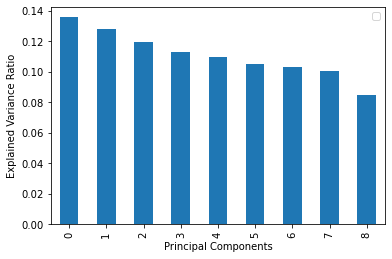

In [170]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

## Applying TSNE on PCA

In [171]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate = 35)
tsne_features = tsne.fit_transform(pca_df)
tsne_features.shape

(1608, 2)

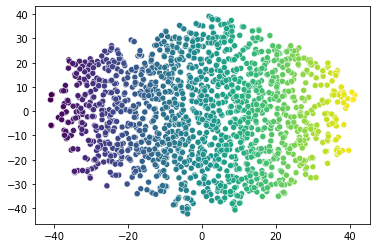

In [173]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# First column of transformed features
tx = tsne_features[:,0]
# Second column of transformed features
ty = tsne_features[:,1]
# Cluster visualizing
c = y.iloc[:1608]
sns.scatterplot(tx, ty, c=tx)
plt.show()

## KMeans with PCA data

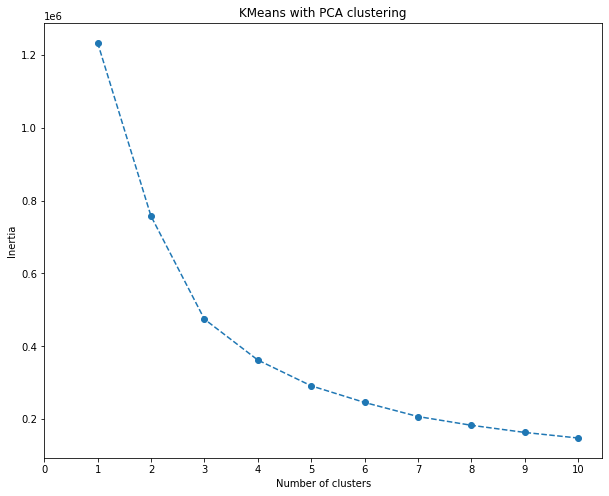

In [137]:
from sklearn.cluster import KMeans

inertia = []
k = list(range(1,11))
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters = i)
    km.fit(pca_df)
    inertia.append(km.inertia_)
elbow_data = pd.DataFrame({'k':k, 'inertia':inertia})
plt.figure(figsize = (10,8))
plt.plot(elbow_data.k, elbow_data.inertia, marker = 'o', linestyle='--')
plt.xticks(list(range(11)))
plt.title("KMeans with PCA clustering")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

* Elbow appears at number 4 so k =4

In [174]:
# Predicting clusters with k = 4
# Initialize the k-means model
model = KMeans(n_clusters = 4, random_state = 0)

# Fit the model
model.fit(pca_df)

# predict clusters
predictions = model.predict(pca_df)

# Add the predicted class column to the dataframe

pca_df['class'] = model.labels_
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,class
0,-1.375846,-0.257473,-0.840479,-0.561863,0.301920,-0.929185,-0.678413,0.708117,-0.017332,1
1,1.021220,-0.036759,-0.090807,-0.276416,-0.640237,-0.277723,-1.007463,0.554831,-0.493413,0
2,1.644379,-0.144929,0.280506,-0.042407,0.901546,0.520350,-0.435301,0.390963,-0.387423,0
3,-0.080823,-0.020750,0.524671,-0.602483,-1.877797,-2.111494,0.460512,0.069702,0.045190,2
4,1.906310,0.355395,-0.146340,1.166660,-0.576534,-2.124914,0.250650,-0.793101,0.636790,0


## KMeans Clustering with PCA

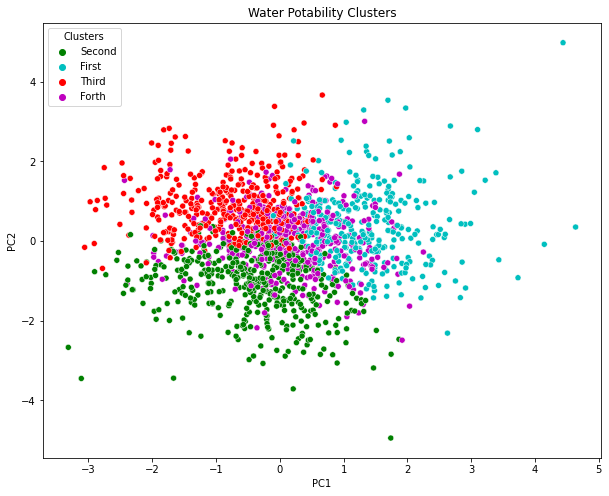

In [177]:
pca_df['Clusters'] = pca_df['class'].map({0:'First', 1:'Second',2:'Third', 3:'Forth'})

plt.figure(figsize = (10,8))
sns.scatterplot(x = pca_df['PC1'], y=pca_df['PC2'], 
           hue = pca_df['Clusters'], palette = ['g', 'c', 'r','m'])
plt.title("Water Potability Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## KMeans Clustering with tSNE

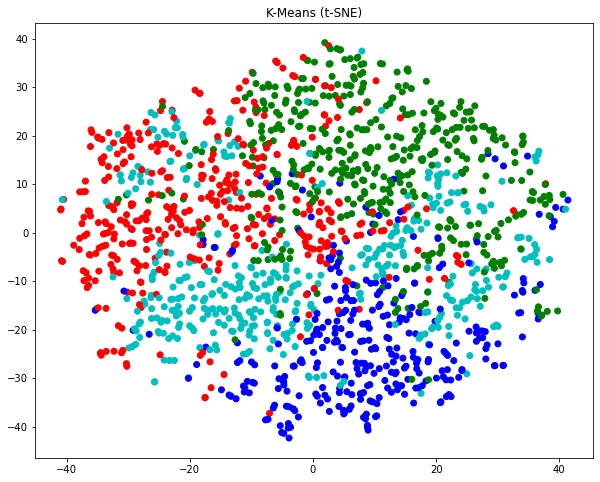

In [178]:
fig,ax = plt.subplots(figsize = (10,8))
#plot graph
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=colors[model.labels_])
plt.title('K-Means (t-SNE)')
plt.show()

## Random Forest Classification

In [180]:
from sklearn.ensemble import RandomForestClassifier
# Fit the model
rfc = RandomForestClassifier(max_depth = 3)
# Train the model
rfc.fit(X_train, y_train)

print(f"Training score : {rfc.score(X_train, y_train)}")
print(f"Testing score : {rfc.score(X_test, y_test)}")

Training score : 0.6411691542288557
Testing score : 0.6451612903225806


Elapsed time to compute the importances: 0.046 seconds


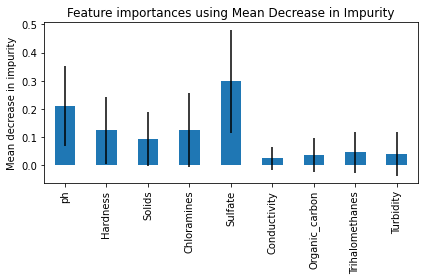

In [181]:
import time
import numpy as np

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time
feature_names = list(X_train.columns)
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

# Impurity based importance
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, )
ax.set_title("Feature importances using Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

* First five features are found important

In [182]:
# Automated Neural Network Model
import tensorflow as tf

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu','tanh', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=9))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=4),
            activation=activation))
    
    # Output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model


In [183]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    factor = 3,
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [184]:
# # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))


INFO:tensorflow:Oracle triggered exit


In [185]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
activation: relu
first_units: 16
num_layers: 3
units_0: 13
units_1: 5
units_2: 17
units_3: 5
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7022332549095154
Trial summary
Hyperparameters:
activation: relu
first_units: 26
num_layers: 2
units_0: 25
units_1: 21
units_2: 29
units_3: 13
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 9e4c1717371529fa5f1b2695ff7bc366
Score: 0.6997518539428711
Trial summary
Hyperparameters:
activation: relu
first_units: 16
num_layers: 2
units_0: 9
units_1: 21
units_2: 17
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 95ef96b68c2c00ddf96b35f5d71661c4
Score: 0.6947891116142273
Trial summary
Hyperparameters:
activation: relu
first_units: 26
num_layers: 2
units_0: 25
units_1: 21
units_2: 29
units_3: 13
tu

In [186]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Create sequential model
model = tf.keras.models.Sequential()

# Create first layer of input
model.add(tf.keras.layers.Dense(units = 11, activation = 'relu', input_dim=9))

# Create hidden layers 
# model.add(tf.keras.layers.Dense(units = 13, activation = 'relu'))
# model.add(tf.keras.layers.Dense(units = 21, activation = 'tanh'))
# model.add(tf.keras.layers.Dense(units = 13, activation = 'relu'))

# Create ouput layers
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Structure of sequential model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 11)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 12        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [187]:
# Compile the model
# lr = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, name='Adam')
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

# Fit the model
fit_model = model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.02) 

Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 0.8352 - accuracy: 0.4756 - val_loss: 0.8861 - val_accuracy: 0.3636
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7837 - accuracy: 0.4952 - val_loss: 0.8381 - val_accuracy: 0.3636
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7496 - accuracy: 0.5092 - val_loss: 0.8039 - val_accuracy: 0.3939
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7262 - accuracy: 0.5238 - val_loss: 0.7712 - val_accuracy: 0.4545
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.5416 - val_loss: 0.7473 - val_accuracy: 0.4848
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5613 - val_loss: 0.7302 - val_accuracy: 0.4848
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5740 - val_loss: 0.7144 - val_accuracy: 0.4848
Epoch 8/100
5

In [188]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Train Loss: {model_loss}, Train Accuracy: {model_accuracy}")
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Test Loss: {model_loss}, Test Accuracy: {model_accuracy}")

51/51 - 0s - loss: 0.5589 - accuracy: 0.7108
Train Loss: 0.5588719844818115, Train Accuracy: 0.7108209133148193
13/13 - 0s - loss: 0.5669 - accuracy: 0.7022
Test Loss: 0.5668872594833374, Test Accuracy: 0.7022332549095154


<AxesSubplot:>

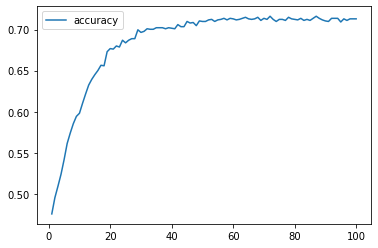

In [190]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

## Summary
* Keras sequential model gives better accuracy for the training and testing data. But, this doesn't seems to be a good prediction. Close look at the data values revealed that more than 60% are out of range of WHO standards.  It is really difficult to believe it as good data set.  It may have wrong entries.  